# Sect 15/16: Hypothesis Testing with Neuro Data 

- online-ds-ft-070620
- 08/18/20

## Learning Objectives

- Discuss A/B Testing/Experimental Design using my neuroscience research data.
- Discuss the multiple comparison problem.
- Discuss ANOVAs
- Discuss Repeated-Measures/Paired T-Tests

# Questions 

- [Resampling Methods  Lab](https://github.com/jirvingphd/dsc-resampling-methods-lab-onl01-dtsc-ft-070620/tree/solution)
    - What is the solution code doing for section 1.5 and section 1.6? 
    - Also is the math in the explanation for 1.6 wrong? For example, it says 5/3 - 2 = ½ but 5/3 - 2 should equal ⅓. 


- Not essential, but if time could we do the bonus to find effect size on 1 sample t-test lab.

- Statistical Power (will def cover tomorrow if not today)

    -  When do we think/worry about this?
    

- **When, if ever, is it appropriate to use SciPy ANOVA over OLS?**

- **KS Test Lab**
    - I second this. 


- [A/B testing lab](https://learn.co/tracks/module-2-data-science-career-2-1/statistics-ab-testing-and-linear-regression/section-16-ab-testing/ab-testing-lab
):
can we talk through the final question of what experimental design parameters would be appropriate to propose?


# REFERENCES


- Hypothesis Testing Workflow:
    - https://github.com/jirvingphd/hypothesis_testing_workflow_python

- **Two-Way and RM ANOVA Resources**
    - [RM ANOVA IN Python with Statsmodels](https://www.marsja.se/repeated-measures-anova-in-python-using-statsmodels/)
    - One-way RM ANOVA (other packages): https://www.marsja.se/repeated-measures-anova-using-python/
    - Two-Way: https://marsja.se/two-way-anova-repeated-measures-using-python/


## Statistical Tests Summary Table



| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 
 
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


# Real-World Science / Experimental Design

> ## The Role of Stress Neurons in the Amygdala in Addiction/Binge Drinking

- We will be talking through some of the experiments from my Postdoctoral research on the roll of stress neurons in the escalation of binge drinking.
- [James' Neuroscience Research Poster: Society for Neuroscience 2016](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">



#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

## Hypothesis 

- Based on prior evidence in the field, stress neurons in the amygdala are believed to be responsible for the negative emotions that promote binge consumption to relieve negative symptoms

$ H_1$: Increasing the activity of stress neurons (CRF neurons) in the amygdala will increase the amount of alcohol consumed by binge-drinking mice.

$H_0$: Stimulation of CRF neurons has no effect on the amount of alcohol consumed.

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_preds1.png" width=60%>

## Experimental Design

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/opto_6steps.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1_no_mouse.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1.png">--->

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

## Hypothesis Testing: Mouse Data

### Hypothesis
> Question: does stimulation of CRF Neurons in the central amygdala increase alcohol consumption?

- Metric:
- Groups:


- $H_1$: 

- $H_0$: 

$\alpha$=0.05


### Step 1: which type of test?

- What type of data?
    -  Numerical (# of licks)
- How many groups?
    -  Control vs Experimental
    - Training Phases (BL,S,PS,R)

#### Let's First Try to Treat this as 2-sample T-Tests (one for each phase)

In [1]:
!pip install -U fsds
from fsds.imports import *

plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


# Obtaining/Preprocessing Data

In [2]:
import os
print(os.getcwd())

/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_070620_FT_cohort_notes/Mod_2/sect_15


In [4]:
df = pd.read_csv('../../datasets/mouse_drinking_data_cleaned.csv',#"../../datasets/mouse_drinking_data_cleaned.csv")#,
                 index_col=0)
df.drop('Sex',axis=1,inplace=True)
df 

,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
Mouse_ID,,,,,,,,,,,,,,,,,,,,,
1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578


#### Laying Out Our Approach

1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`)

2. Make a new df of means using `col_dict`

3. Make a grp dict using  `df_means.groupby('Group').groups` 

- Visualize the two populations

- Prepare for hypothesis tests
    - Either use `grps` dict to reference the correct columsn to pass into tests

<!---
**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group? --->

In [8]:
## Loop through the differnet phases of the experiment
phases = ['BL','S','PS','R1','R2']

## save corresponding column names as values 
col_dict ={}
for phase in phases:
    list_cols = [col for col in df.columns if col.startswith(phase)]
    col_dict[phase] = list_cols
col_dict

{'BL': ['BL1', 'BL2', 'BL3', 'BL4'],
 'S': ['S1', 'S2', 'S3', 'S4'],
 'PS': ['PS1', 'PS2', 'PS3', 'PS4'],
 'R1': ['R1_1', 'R1_2', 'R1_3', 'R1_4'],
 'R2': ['R2_1', 'R2_2', 'R2_3', 'R2_4']}

In [11]:
## Get then opposite of col_dict
phase_dict = {}

for phase, colnames in col_dict.items():
    for col in colnames:
        phase_dict[col]= phase
phase_dict

{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1_1': 'R1',
 'R1_2': 'R1',
 'R1_3': 'R1',
 'R1_4': 'R1',
 'R2_1': 'R2',
 'R2_2': 'R2',
 'R2_3': 'R2',
 'R2_4': 'R2'}

### Calculating individual mouse means by phase

In [17]:
df[ df['Group'] == 'Control']

,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
Mouse_ID,,,,,,,,,,,,,,,,,,,,,
1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
12,Control,494,602,570,530,570,396,403,380,362,467,491,557,98,262,344,388,435,551,552,537
13,Control,587,630,564,627,572,419,369,416,403,552,575,589,172,298,422,596,447,589,463,364
14,Control,917,680,737,596,699,484,452,438,547,729,830,411,71,386,581,832,586,610,634,716
15,Control,440,767,642,623,532,663,601,553,315,434,543,619,115,101,356,457,412,582,549,696
22,Control,270,132,250,192,364,229,219,329,120,147,186,337,8,70,18,175,232,238,209,200


In [20]:
df.groupby('Group').get_group('Control')

,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
Mouse_ID,,,,,,,,,,,,,,,,,,,,,
1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
12,Control,494,602,570,530,570,396,403,380,362,467,491,557,98,262,344,388,435,551,552,537
13,Control,587,630,564,627,572,419,369,416,403,552,575,589,172,298,422,596,447,589,463,364
14,Control,917,680,737,596,699,484,452,438,547,729,830,411,71,386,581,832,586,610,634,716
15,Control,440,767,642,623,532,663,601,553,315,434,543,619,115,101,356,457,412,582,549,696
22,Control,270,132,250,192,364,229,219,329,120,147,186,337,8,70,18,175,232,238,209,200


In [25]:
df.groupby('Group').groups

{'Control': [1, 2, 3, 4, 12, 13, 14, 15, 22], 'Experimental': [5, 6, 7, 8, 9, 10, 11, 16, 17, 18, 19, 20, 21]}

### Analyzing Stim Days

In [26]:
## Dict data
groups_list = df['Group'].unique()
groups_list

array(['Control', 'Experimental'], dtype=object)

In [80]:
phase = "R1"
data = {}

for group in groups_list:
    grp_df  = df[ df['Group']==group][col_dict[phase]].copy()
    data[group] = grp_df.mean(axis=1)

In [81]:
data['Control']#mean(axis=1)

Mouse_ID
1     289.50
2     356.75
3     443.75
4     402.25
12    273.00
13    372.00
14    467.50
15    257.25
22     67.75
dtype: float64

In [82]:
data.keys()

dict_keys(['Control', 'Experimental'])

In [83]:
from scipy import stats
def find_outliers_z(fullprice_products):
    zFP = np.abs(stats.zscore(fullprice_products))
    
    zFP = pd.Series(zFP, index=fullprice_products.index)
    idx_outliers = zFP > 3
    return idx_outliers

In [84]:
clean_data = {}
for grp,grp_df in data.items():
    
    idx_outs = find_outliers_z(grp_df)

    clean_data[grp] = grp_df[~idx_outs]
    

In [85]:
clean_data

{'Control': Mouse_ID
 1     289.50
 2     356.75
 3     443.75
 4     402.25
 12    273.00
 13    372.00
 14    467.50
 15    257.25
 22     67.75
 dtype: float64,
 'Experimental': Mouse_ID
 5     619.75
 6     808.75
 7     588.00
 8     106.00
 9     268.75
 10    640.75
 11    623.00
 16    647.25
 17    582.75
 18    780.50
 19    575.00
 20     85.25
 21    504.75
 dtype: float64}

In [86]:
idx_outs = find_outliers_z(data['Experimental'])
idx_outs

Mouse_ID
5     False
6     False
7     False
8     False
9     False
10    False
11    False
16    False
17    False
18    False
19    False
20    False
21    False
dtype: bool

In [87]:
data['Experimental'][~idx_outs]

Mouse_ID
5     619.75
6     808.75
7     588.00
8     106.00
9     268.75
10    640.75
11    623.00
16    647.25
17    582.75
18    780.50
19    575.00
20     85.25
21    504.75
dtype: float64

### Getting Group Data For EDA & Testing

In [88]:
results = [['Group','Assumption','n','p','p<.05']]

test_equal_var = []
for grp, grp_df in clean_data.items():
    
    test_equal_var.append(grp_df)
    stat,p = stats.normaltest(grp_df)
    
    results.append([grp, 'Normality', len(grp_df),p, p<.05])

stat,p = stats.levene(*test_equal_var)
results.append(['All','Equal Variance','-',p, p<.05])

    

res_df = pd.DataFrame(results[1:],columns=results[0])
res_df

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Group,Assumption,n,p,p<.05
0,Control,Normality,9,0.140,False
1,Experimental,Normality,13,0.215,False
2,All,Equal Variance,-,0.323,False


In [89]:
tstats,tp = stats.ttest_ind(*test_equal_var)
tp

0.02788240296608544

In [90]:
ustat,up = stats.mannwhitneyu(*test_equal_var)
up

0.009713562803228349

<BarContainer object of 1 artists>

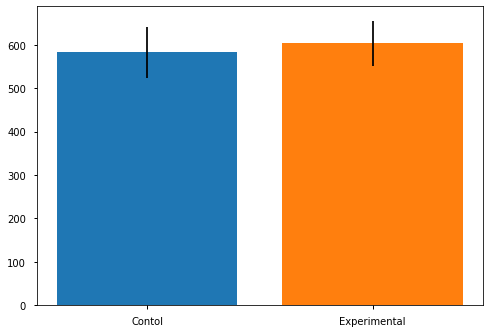

In [78]:
plt.bar('Contol',data['Control'].mean(),yerr= stats.sem(data['Control']))
plt.bar('Experimental',data['Experimental'].mean(),yerr= stats.sem(data['Experimental']))

In [92]:
df.reset_index(drop=False,inplace=True)
df

,Mouse_ID,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
0,1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
1,2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
2,3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
3,4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
4,5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
5,6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
6,7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
7,8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
8,9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578
9,10,Experimental,953,988,579,706,1106,812,902,835,829,801,1011,919,274,559,840,890,724,793,559,700


### Plotting Group Means + Standard Error of the Mean

In [96]:
df2 = pd.melt(df, id_vars=['Mouse_ID','Group'], value_name='Licks',var_name='Day')
df2

,Mouse_ID,Group,Day,Licks
0,1,Control,BL1,665
1,2,Control,BL1,859
2,3,Control,BL1,589
3,4,Control,BL1,939
4,5,Experimental,BL1,710
...,...,...,...,...
435,18,Experimental,R2_4,880
436,19,Experimental,R2_4,1047
437,20,Experimental,R2_4,293
438,21,Experimental,R2_4,900


In [97]:
phase_dict

{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1_1': 'R1',
 'R1_2': 'R1',
 'R1_3': 'R1',
 'R1_4': 'R1',
 'R2_1': 'R2',
 'R2_2': 'R2',
 'R2_3': 'R2',
 'R2_4': 'R2'}

In [99]:
## Add phase
df2['Phase'] = df2['Day'].map(phase_dict)
df2

,Mouse_ID,Group,Day,Licks,Phase
0,1,Control,BL1,665,BL
1,2,Control,BL1,859,BL
2,3,Control,BL1,589,BL
3,4,Control,BL1,939,BL
4,5,Experimental,BL1,710,BL
...,...,...,...,...,...
435,18,Experimental,R2_4,880,R2
436,19,Experimental,R2_4,1047,R2
437,20,Experimental,R2_4,293,R2
438,21,Experimental,R2_4,900,R2


In [101]:
## Getting Day of Phase
df2['Day_of_Phase'] = df2['Day'].apply(lambda x: x[-1])
df2

,Mouse_ID,Group,Day,Licks,Phase,Day_of_Phase
0,1,Control,BL1,665,BL,1
1,2,Control,BL1,859,BL,1
2,3,Control,BL1,589,BL,1
3,4,Control,BL1,939,BL,1
4,5,Experimental,BL1,710,BL,1
...,...,...,...,...,...,...
435,18,Experimental,R2_4,880,R2,4
436,19,Experimental,R2_4,1047,R2,4
437,20,Experimental,R2_4,293,R2,4
438,21,Experimental,R2_4,900,R2,4


In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [114]:
df2.head()

,Mouse_ID,Group,Day,Licks,Phase,Day_of_Phase
0,1,Control,BL1,665,BL,1
1,2,Control,BL1,859,BL,1
2,3,Control,BL1,589,BL,1
3,4,Control,BL1,939,BL,1
4,5,Experimental,BL1,710,BL,1


In [115]:
formula= 'Licks~C(Group)*C(Phase)'
lm = ols(formula,df2).fit()

table = sm.stats.anova_lm(lm,typ=2)
table['sig'] = table['PR(>F)'] <.05
table

,sum_sq,df,F,PR(>F),sig
C(Group),4.951e+05,1.0,9.240,2.512e-03,True
C(Phase),2.254e+06,4.0,10.516,3.892e-08,True
C(Group):C(Phase),9.140e+05,4.0,4.264,2.147e-03,True
Residual,2.304e+07,430.0,NaN,NaN,False


<AxesSubplot:xlabel='Phase', ylabel='Licks'>

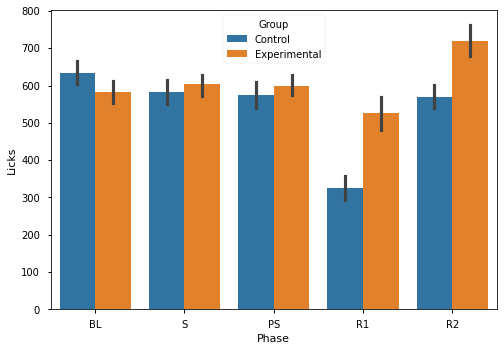

In [107]:
sns.barplot('Phase','Licks',data=df2, hue='Group',ci=68)

In [111]:
from statsmodels.stats.multicomp import  pairwise_tukeyhsd
res = pairwise_tukeyhsd(df2['Licks'],df2['Phase'])
res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BL,PS,-14.1705,0.9,-112.0762,83.7353,False
BL,R1,-159.6705,0.001,-257.5762,-61.7647,True
BL,R2,55.4432,0.5256,-42.4626,153.3489,False
BL,S,-8.75,0.9,-106.6557,89.1557,False
PS,R1,-145.5,0.001,-243.4057,-47.5943,True
PS,R2,69.6136,0.2939,-28.2921,167.5194,False
PS,S,5.4205,0.9,-92.4853,103.3262,False
R1,R2,215.1136,0.001,117.2079,313.0194,True
R1,S,150.9205,0.001,53.0147,248.8262,True
R2,S,-64.1932,0.3782,-162.0989,33.7126,False


In [113]:
from statsmodels.stats.anova import AnovaRM

# df2.groupby('Group').get_group('Experimental')
aovrm = AnovaRM(df2,#.groupby('Group').get_group('Experimental'),
                'Licks', 'Mouse_ID', within=['Phase'],between='Groups')#,#aggregate_func=np.nanmean)#,between=['Group'])
res = aovrm.fit()

print(res)

NotImplementedError: Between subject effect not yet supported!

### Adding Levene's Test

### Run Correct Test

## RM ANOVA Melting DF

## CONCLUSION
- Running the correct test according to the assumptions of normality and equal variance will ensure you can get the correct test result.

- Notice how the last phase (R) did NOT come back as significant when we ran the t-test, but DID come back significant when we performed the Mann Whitney U instead. 



(https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)

## Effect Size Visual
- https://rpsychologist.com/d3/NHST/


## Ephys Figure
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_fig1.png">

## Statistical Analysis Pipeline

1. **Test for Normality**
    - D'Agostino-Pearson's normality test<br>
    ```scipy.stats.normaltest```
    - Shapiro-Wilik Test<br>
    ```scipy.stats.shapiro```<br>
    
    
2. **Test for Homogeneity of Variance**

    - Levene's Test<br>
    ```scipy.stats.levene```


3. **Choose appropriate test based upon 1. and 2.** <br> 
    - T Test (1-sample)
        - `stats.ttest_1samp()`
    - T Test (2-sample)
        - `stats.ttest_ind()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
    - Welch's T-Test (2-sample)
        - `stats.ttest_ind(equal_var=False)`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
        
    - Mann Whitney U
        - `stats.mannwhitneyu()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)
    - ANOVA 
        - `stats.f_oneway()`
        - [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
    - Tukey's
     - `statsmodels.stats.multicomp.pairwise_tukeyhsd`
     -[docs](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
    

4. **Calculate effect size for significant results.**
    - Effect size: [cohen's d](https://stackoverflow.com/questions/21532471/how-to-calculate-cohens-d-in-python)
    - Interpretation:
        - Small effect = 0.2 ( cannot be seen by naked eye)
        - Medium effect  = 0.5
        - Large Effect = 0.8 (can be seen by naked eye)
        
5. **If significant, follow up with post-hoc tests (if have more than 2 groups)**
    - [Tukey's](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
